https://thecleverprogrammer.com/2020/11/14/stock-price-prediction-using-machine-learning/

Stock Price Prediction using Machine Learning
Machine Learning Project for beginners on Stock Price Prediction.

Publish by Aman Kharwal - November 14, 2020

Predicting the stock market is one of the most important applications of Machine Learning in finance. In this article, I will take you through a simple Data Science project on Stock Price Prediction using Machine Learning Python.

In [89]:
###https://www.marketwatch.com/investing/fund/ethe11/download-data?startDate=02/17/2021&endDate=02/17/2022&countryCode=br
#fname = '/content/FUND_BR_BVMF_ETHE11.csv'
#fname = '/content/STOCK_BR_BVMF_MGLU3.csv'
#fname = '/content/STOCK_BR_BVMF_MGLU3_2019_2022.csv'
fname = '/content/STOCK_BR_BVMF_MGLU3_2022.csv'

In [8]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [47]:
def prepare_data(df, forecast_col, forecast_out, test_size):
  """
  """
  # creating new column called label with the last 5 row are nan
  label = df[forecast_col].shift(-forecast_out) 

  # creating the feature array
  x = np.array(df[[forecast_col]])

  # processing the feature array
  x = preprocessing.scale(x)

  # creating the column i want to use later in the predicting method
  x_lately = x[-forecast_out:]

  # x that will contain th training and testing
  x = x[:-forecast_out]

  # dropping nan values
  label.dropna(inplace=True)

  # assigning y
  y = np.array(label)

  # cross validation
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)

  response = [x_train, x_test, y_train, y_test, x_lately]

  return response

In [22]:
forecast_col = 'Close' ### prices on the end market
forecast_out = 5 ## Which values will be forecasted
test_size = 0.2 ### train/test sample (80%/20%)

In [90]:
df = pd.read_csv(fname)
df = df[['Date', 'Close']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    34 non-null     object 
 1   Close   34 non-null     float64
dtypes: float64(1), object(1)
memory usage: 672.0+ bytes


In [91]:
### calling the method were the cross validation and data preparation is in
x_train, x_test, y_train, y_test, x_lately = prepare_data(df, forecast_col, forecast_out, test_size)

In [92]:
# Initializing linear regression model
lnr = LinearRegression()

In [93]:
lnr.fit(x_train, y_train)

LinearRegression()

In [94]:
# testing the linear regression model
score = lnr.score(x_test, y_test)
# set that will contain the forecasted data
forecast = lnr.predict(x_lately)

#creating json object
response = {}
response['test_score'] = score
response['forecast_set'] = forecast

print(response['test_score'])
print(response['forecast_set'])

-0.440327579961616
[6.49472825 6.49858588 6.52044578 6.54487743 6.55902207]


In [95]:
df.Close.tail(forecast_out) ## to compare

29    6.22
30    6.25
31    6.42
32    6.61
33    6.72
Name: Close, dtype: float64

In [ ]:
### https://thecleverprogrammer.com/2021/01/05/bitcoin-price-prediction-with-python/
### I use the another example, from the same author

In [96]:
###https://www.marketwatch.com/investing/fund/ethe11/download-data?startDate=02/17/2021&endDate=02/17/2022&countryCode=br
df = pd.read_csv(fname)

In [97]:
df.head(3)

,Date,Open,High,Low,Close,Volume
0,02/17/2022,6.81,6.93,6.59,6.63,"97,374,703"
1,02/16/2022,6.83,6.98,6.72,6.82,"100,338,492"
2,02/15/2022,6.61,6.84,6.61,6.84,"94,930,305"


In [98]:
df = df[['Date', 'Close']]
df.columns=['ds', 'y']

In [99]:
df.head(3)

,ds,y
0,02/17/2022,6.63
1,02/16/2022,6.82
2,02/15/2022,6.84


In [100]:
from fbprophet import Prophet
pht = Prophet()
pht.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [104]:
future = pht.make_future_dataframe(periods=1)
#print(future)

In [105]:
forecast = pht.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5)

,ds,yhat,yhat_lower,yhat_upper
30,2022-02-14,6.609554,6.229336,6.997359
31,2022-02-15,6.712478,6.339783,7.083413
32,2022-02-16,6.746774,6.374080,7.094006
33,2022-02-17,6.831116,6.423593,7.201693
34,2022-02-18,6.724437,6.347550,7.115679


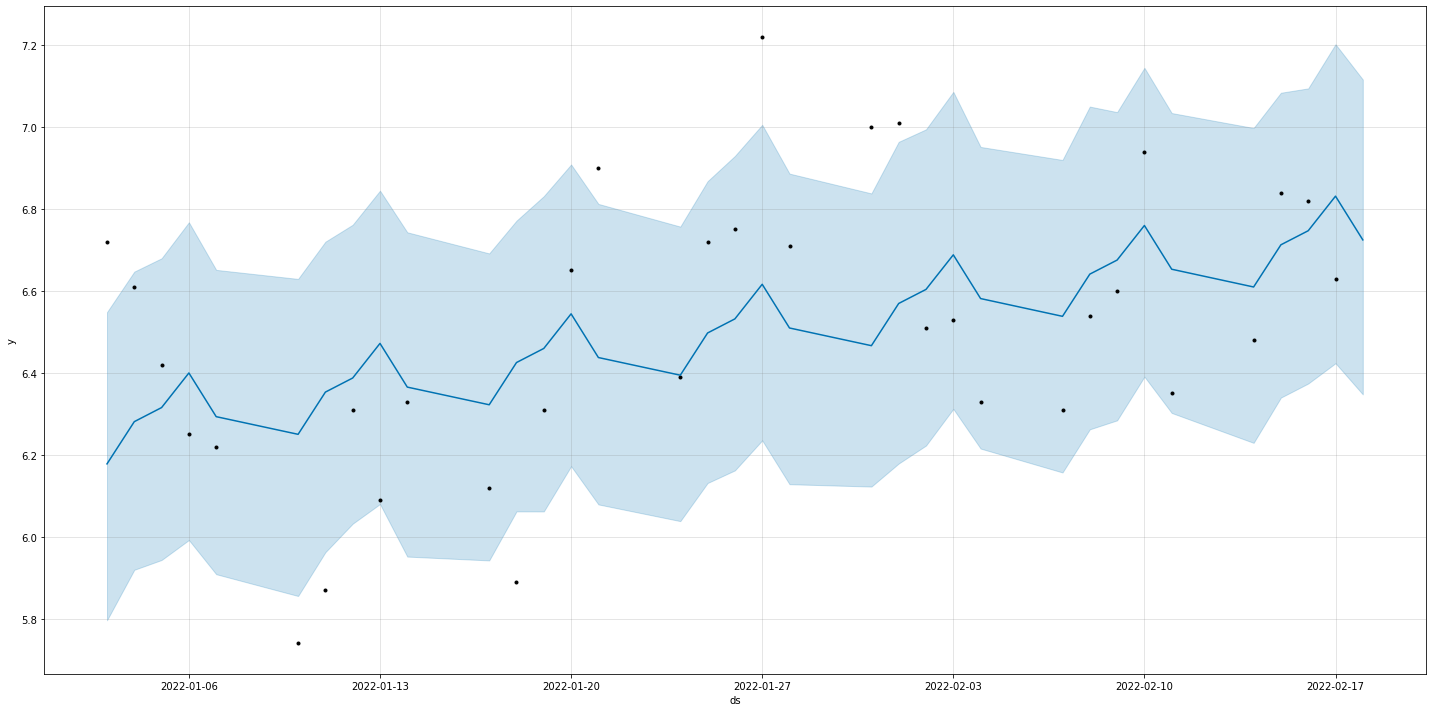

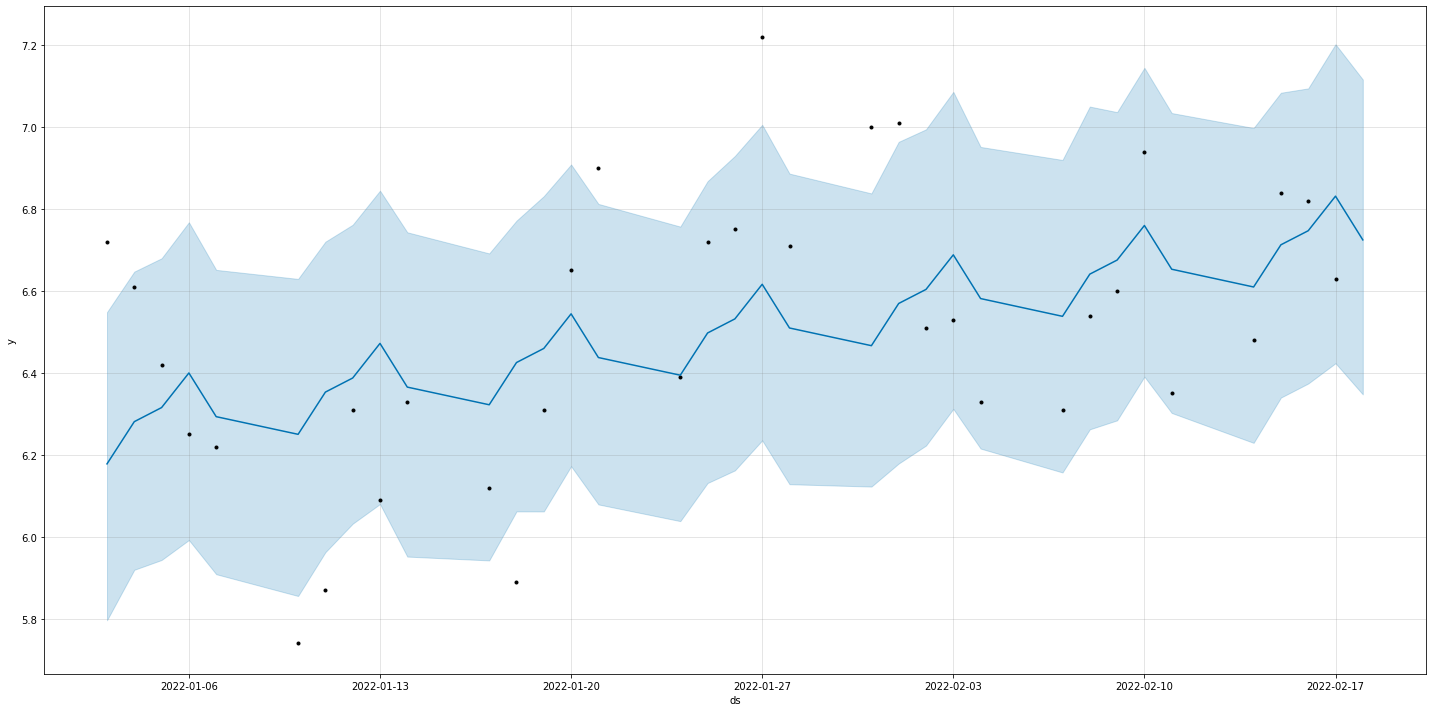

In [106]:
#from fbprophet.plot import plot
pht.plot(forecast, figsize=(20, 10))